Lee Jae Yeol 
Math 4432 Assignment 3 - AdaBoost
20308109

In [155]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [156]:
data_train = pd.read_csv("data_train.txt", sep = "\t")
train_x = np.matrix(data_train.iloc[:,1:])
train_y = data_train.iloc[:,0]
data_test = pd.read_csv("data_test.txt", sep = "\t")
test_x = np.matrix(data_test.iloc[:,1:])
test_y = data_test.iloc[:,0]
niter = 1000

In [39]:
print(train_x)
train_x.shape

[[0.5074782  0.22308839 0.8879149  ... 0.42355074 0.48086361 0.7040769 ]
 [0.30676851 0.535895   0.68551147 ... 0.31009193 0.09456052 0.16368128]
 [0.42690767 0.6625291  0.6296311  ... 0.17349788 0.63971287 0.06164973]
 ...
 [0.27988011 0.61690438 0.04777462 ... 0.79832086 0.39999619 0.60803297]
 [0.89009404 0.13576564 0.89861233 ... 0.11331624 0.49857317 0.88910212]
 [0.71584928 0.908929   0.63807972 ... 0.80467937 0.18993727 0.01982391]]


(200, 20)

In [40]:
print(train_y.head(20))
train_y.shape

0     1
1     1
2     1
3     1
4     1
5    -1
6     1
7    -1
8     1
9    -1
10   -1
11    1
12   -1
13   -1
14   -1
15   -1
16    1
17   -1
18   -1
19   -1
Name: y, dtype: int64


(200,)

In [152]:
def Adaboost(x,y, iteration, treedepth=1):
    size = train_y.shape[0]
    weight = np.array([1/size for i in range(size)])
    models = [None]*iteration
    
    for i in range(iteration):
        stump = DecisionTreeClassifier(max_depth = treedepth)
        stump_fit = stump.fit(x,y, sample_weight = weight).predict
        error = sum(weight * (y != stump_fit(x)))/sum(weight)
        alpha = np.log((1-error)/error)
        
        weight = np.array(weight *np.exp(alpha * (y!= stump_fit(x))))
        models[i] =(alpha, stump_fit)
        
    return models

def predict(models, iteration, test_x, test_y):
    y = 0
    eval = []
    for i in range(iteration):
        alpha, stump_fit = models[i]
        y += alpha * stump_fit(test_x)
        x = np.where(y < 0, -1, 1)
        eval.append(1 - accuracy_score(x, test_y))
    y_pred = np.where(y < 0, -1, 1)
    return y_pred, eval

In [153]:
ada = Adaboost(train_x, train_y, niter, 1)
y_pred, eval = predict(ada, niter, test_x, test_y)

In [154]:
print("average misclassification rate : %f" %np.average(eval))
print("lowest misclassification rate : %f" %min(eval))

average misclassification rate : 0.194961
lowest misclassification rate : 0.177000


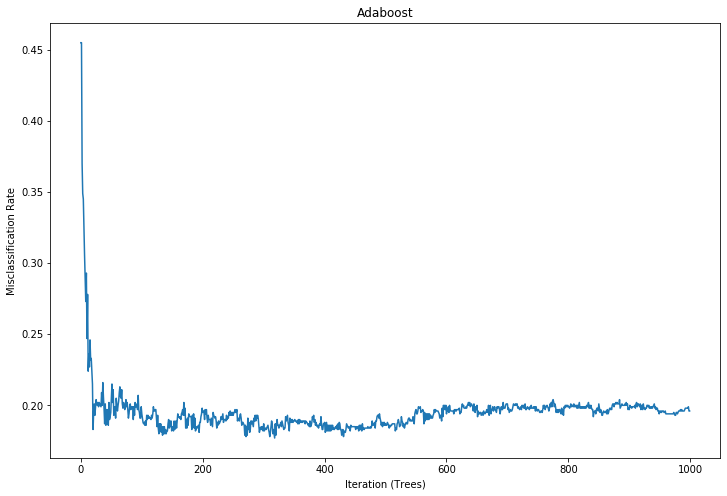

In [145]:
fig = plt.figure(figsize=(12,8))
plt.plot(eval)
plt.title("Adaboost")
plt.xlabel("Iteration (Trees)")
plt.ylabel("Misclassification Rate")
plt.show()